In [1]:
# Basics 
import numpy as np
import sys
import pickle
import os

# plotting 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline 
from IPython.display import Image,display
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.image as mpimg
import matplotlib.patches as patches
from matplotlib.colors import LinearSegmentedColormap

In [2]:
sys.path.append('../cvar_single_choice/')
from CVaR_Calculation import calc_cvar, find_CVaR_SLSQP

## Data

In [3]:
np.random.seed(5)
f = np.random.normal(-1.5,0.5,1000) # left 
g = np.random.normal(1.5,0.5,10000) # right 
e = np.append(f,g)
var,cvar,_ = calc_cvar(e,0.1)
print(var,cvar)

0.33777749217907693 -1.3348423700175789


## Panel (a)

/tmp/ipykernel_20622/1298312339.py:125: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


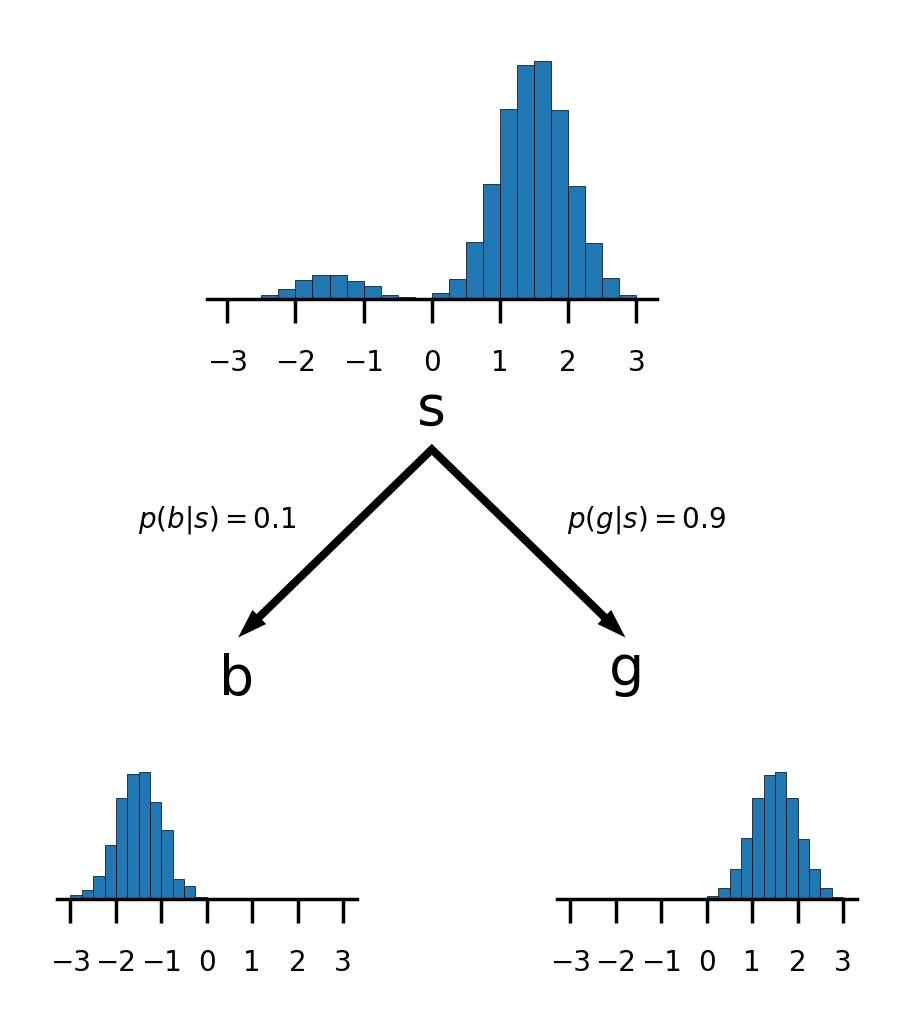

In [4]:
fontsize = 6

fig= plt.figure(figsize=(2,2),dpi=500)

fs = 6
lw = 0.1

# top node  
left =0.25
bottom = 0.7
width = 0.45
height=0.25
ax1 = plt.axes([left,bottom, width, height]) # left, bottom, width, height
plt.sca(ax1)

xmin = -3
xmax = 3.1

bins = np.arange(xmin,xmax,0.25)
plt.hist(f,density=False,color=sns.color_palette()[0],bins=bins,
         alpha=1,edgecolor='k',linewidth=lw)
plt.hist(g,density=False,color=sns.color_palette()[0],bins=bins,
         alpha=1,edgecolor='k',linewidth=lw)
plt.xticks(np.arange(xmin,xmax,1))


arrow1_x0 = arrow2_x0 = left + width/2
arrow1_y0 = arrow2_y0 =bottom-0.15


# left leff 
left =0.1
bottom = 0.1
width = 0.3
height=0.2
ax2 = plt.axes([left,bottom, width, height]) # left, bottom, width, height

arrow1_x1 = left+width/2 + 0.05
arrow1_y1 = bottom+height+0.08

plt.sca(ax2)
plt.hist(f,density=False,color=sns.color_palette()[0],bins=bins,
         alpha=1,edgecolor='k',linewidth=lw)
plt.xticks(np.arange(xmin,xmax,1))
ax = plt.gca()
ylim = ax.get_ylim()
plt.ylim(0,ylim[1]*1.5)

# right leff 
left =0.6
bottom = 0.1
width = 0.3
height=0.2
ax3 = plt.axes([left,bottom, width, height]) # left, bottom, width, height

arrow2_x1 = left+width/2 - 0.1
arrow2_y1 = bottom+height+0.08

plt.sca(ax3)
plt.hist(g,density=False,color=sns.color_palette()[0],bins=bins,
         alpha=1,edgecolor='k',linewidth=lw)
plt.xticks(np.arange(xmin,xmax,1))
ax = plt.gca()
ylim = ax.get_ylim()
plt.ylim(0,ylim[1]*1.5)


for ax in [ax1,ax2,ax3]:
    ax.get_yaxis().set_visible(False)
    plt.sca(ax)
    sns.despine(left=True)
    plt.xticks(fontsize=fs-2)

# left arrow 
plt.arrow(arrow1_x0,
          arrow1_y0,
          arrow1_x1-arrow1_x0,
          arrow1_y1-arrow1_y0,
          transform=plt.gcf().transFigure,
          clip_on=False,head_width=.01,
          linewidth=1,color='k')

# right arrow 
plt.arrow(arrow2_x0,
          arrow2_y0,
          arrow2_x1-arrow2_x0,
          arrow2_y1-arrow2_y0,
          transform=plt.gcf().transFigure,
          clip_on=False,head_width=.01,
          linewidth=1,color='k')

# probability labels
plt.text(arrow2_x1+0.04,
         arrow2_y1+0.1,r'$p(g|s)=0.9$',fontsize=fontsize-2,zorder=3,
         va='center',ha='center',transform=plt.gcf().transFigure)
plt.text(arrow1_x1-0.04,
         arrow1_y1+0.1,r'$p(b|s)=0.1$',fontsize=fontsize-2,zorder=3,
         va='center',ha='center',transform=plt.gcf().transFigure)


plt.text(arrow1_x0,
         arrow1_y0+0.04,r's',fontsize=fs+2,zorder=3,
         va='center',ha='center',transform=plt.gcf().transFigure)
plt.text(arrow1_x1-0.02,
         arrow1_y1-0.06,r'b',fontsize=fs+2,zorder=3,
         va='center',ha='center',transform=plt.gcf().transFigure)
plt.text(arrow2_x1+0.02,
         arrow2_y1-0.05,r'g',fontsize=fs+2,zorder=3,
         va='center',ha='center',transform=plt.gcf().transFigure)


# Vertical Lines, Top Distribution
plt.sca(ax1)
var = -1.5
ymax = ax1.get_ylim()[1]


for ax in [ax1,ax2,ax3]:
    ax.spines['bottom'].set_linewidth(0.5)
    ax.xaxis.set_tick_params(width=0.5)




plt.tight_layout()

## Panel (b)

In [5]:
var_f,cvar_f,_ = calc_cvar(f,0.1)
print(var_f,cvar_f)
var_f_round = -2.25

-2.0972819010171198 -2.355919135925671


/tmp/ipykernel_20622/3900324039.py:165: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


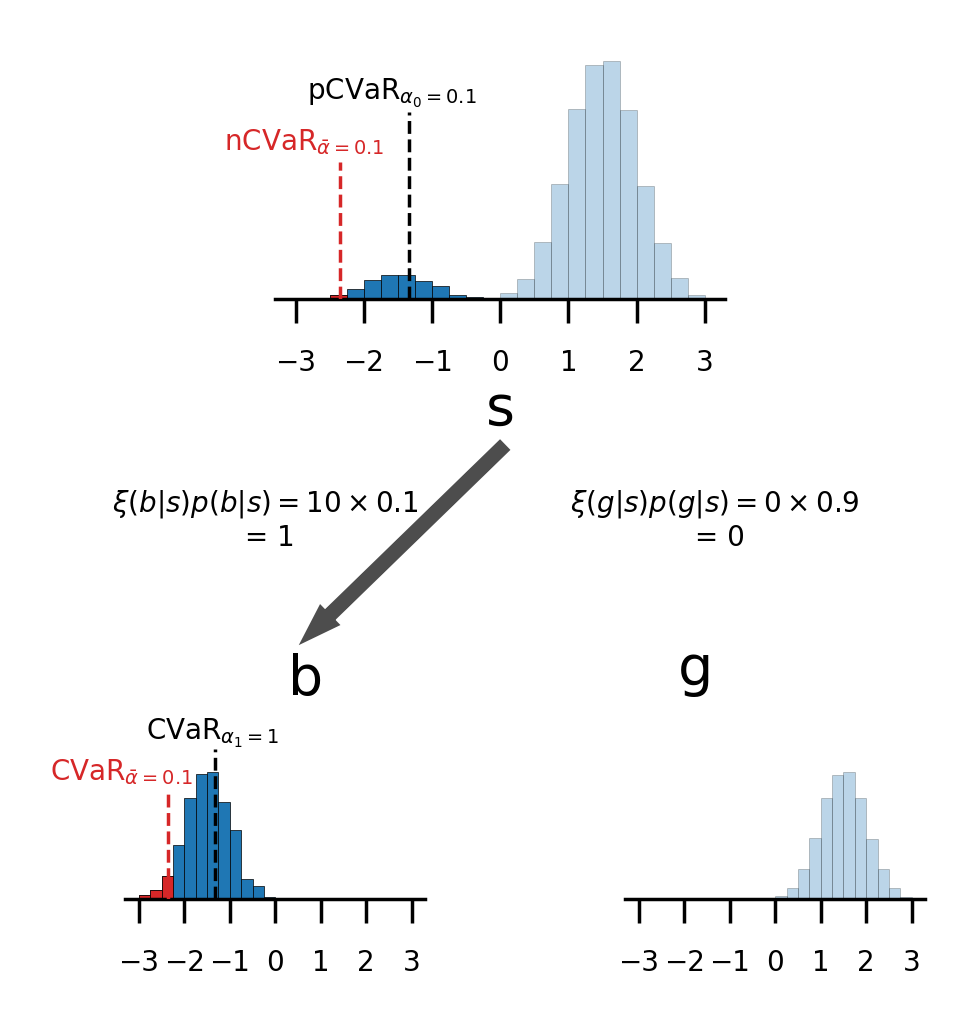

In [6]:

othercolor = 3
otheralpha = 1
lw = 0.1
fig= plt.figure(figsize=(2,2),dpi=500)

fs = 6

# top node  
left =0.25
bottom = 0.7
width = 0.45
height=0.25
ax1 = plt.axes([left,bottom, width, height]) # left, bottom, width, height
plt.sca(ax1)

xmin = -3
xmax = 3.1

bins = np.arange(xmin,xmax,0.25)

plt.hist(g,density=False,color=sns.color_palette()[0],
         alpha=0.3,edgecolor='k',linewidth=lw,bins=bins)
plt.hist(f,density=False,color=sns.color_palette()[0],
         alpha=1,edgecolor='k',linewidth=lw,bins=bins)
plt.hist(f[f<=var_f_round],density=False,color=sns.color_palette()[othercolor],
         alpha=otheralpha,edgecolor='k',linewidth=lw,bins=bins) #zorder=10,

plt.xticks(np.arange(xmin,xmax,1))

arrow1_x0 = arrow2_x0 = left + width/2
arrow1_y0 = arrow2_y0 =bottom-0.15

# left leff 
left =0.1
bottom = 0.1
width = 0.3
height=0.2
ax2 = plt.axes([left,bottom, width, height]) # left, bottom, width, height

arrow1_x1 = left+width/2 + 0.05
arrow1_y1 = bottom+height+0.08

plt.sca(ax2)
plt.hist(f,density=False,color=sns.color_palette()[0],
         alpha=1,edgecolor='k',linewidth=lw,bins=bins)

plt.hist(f[f<var_f_round],density=False,color=sns.color_palette()[othercolor],
         alpha=otheralpha,edgecolor='k',linewidth=lw,bins=bins)

plt.xticks(np.arange(xmin,xmax,1))
ax = plt.gca()
ylim = ax.get_ylim()
plt.ylim(0,ylim[1]*1.5)

# right leff 
left =0.6
bottom = 0.1
width = 0.3
height=0.2
ax3 = plt.axes([left,bottom, width, height]) # left, bottom, width, height

arrow2_x1 = left+width/2 - 0.1
arrow2_y1 = bottom+height+0.08

plt.sca(ax3)
plt.hist(g,density=False,color=sns.color_palette()[0],
         alpha=0.3,edgecolor='k',linewidth=lw,bins=bins)
plt.xticks(np.arange(xmin,xmax,1))

ax = plt.gca()
ylim = ax.get_ylim()
plt.ylim(0,ylim[1]*1.5)

for ax in [ax1,ax2,ax3]:
    ax.get_yaxis().set_visible(False)
    plt.sca(ax)
    sns.despine(left=True)
    plt.xticks(fontsize=fs-2)

# left arrow 
plt.arrow(arrow1_x0,
          arrow1_y0,
          arrow1_x1-arrow1_x0,
          arrow1_y1-arrow1_y0,
          transform=plt.gcf().transFigure,
          clip_on=False,head_width=.01,
          linewidth=2,color=(0.3,0.3,0.3,1))


# probability labels
plt.text(arrow2_x1+0.04,
         arrow2_y1+0.1,r'$\xi(g|s)p(g|s)=0 \times 0.9$'+'\n'+r' = 0',fontsize=fontsize-2,zorder=3,
         va='center',ha='center',transform=plt.gcf().transFigure)
plt.text(arrow1_x1-0.06,
         arrow1_y1+0.1,r'$\xi(b|s)p(b|s)=10 \times 0.1$'+'\n'+r' = 1',fontsize=fontsize-2,zorder=3,
         va='center',ha='center',transform=plt.gcf().transFigure)


plt.text(arrow1_x0,
         arrow1_y0+0.04,r's',fontsize=fs+2,zorder=3,
         va='center',ha='center',transform=plt.gcf().transFigure)
plt.text(arrow1_x1-0.02,
         arrow1_y1-0.06,r'b',fontsize=fs+2,zorder=3,
         va='center',ha='center',transform=plt.gcf().transFigure)
plt.text(arrow2_x1+0.02,
         arrow2_y1-0.05,r'g',fontsize=fs+2,zorder=3,
         va='center',ha='center',transform=plt.gcf().transFigure)

# Vertical Lines Top 
plt.sca(ax1)
var = -1.5
ymax = ax1.get_ylim()[1]

# pCVaR
plt.axvline(x=cvar,
            ymax=0.75,color='k',linestyle='--',linewidth=0.5,zorder=3)
plt.text(cvar-1.5,
         ymax*0.8,r'pCVaR$_{\alpha_0=0.1}$',fontsize=fs-2)

# nCVaR
plt.axvline(x=cvar_f,
            ymax=0.55,color=sns.color_palette()[othercolor],linestyle='--',linewidth=0.5,zorder=3)
plt.text(cvar_f-1.7,
         ymax*0.6,r'nCVaR$_{\bar{\alpha}=0.1}$',fontsize=fs-2,color=sns.color_palette()[othercolor])


# Vertical Lines Bottom Left 

plt.sca(ax2)
var = -1

plt.axvline(x=cvar,
            ymax=0.75,
            color='k',
            linestyle='--',
            linewidth=0.5,
            zorder=3)

plt.axvline(x=cvar_f,
            ymax=0.55,
            color=sns.color_palette()[othercolor],
            linestyle='--',
            linewidth=0.5,
            zorder=3)


ax = plt.gca()
ylim = ax.get_ylim()

plt.text(cvar-1.5,
         ylim[1]*0.80,r'CVaR$_{\alpha_1=1}$',fontsize=fs-2)


plt.text(cvar_f-2.6,
         ylim[1]*0.6,r'CVaR$_{\bar{\alpha}=0.1}$',fontsize=fs-2,color=sns.color_palette()[othercolor])


for ax in [ax1,ax2,ax3]:
    ax.spines['bottom'].set_linewidth(0.5)
    ax.xaxis.set_tick_params(width=0.5)




plt.tight_layout()